In [1]:
# change the width of the current notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%bash

module purge
module load unstable python-dev python

python -m venv ./python-venv
source ./python-venv/bin/activate

pip install psutil

Autoloading python/3.9.7
Autoloading py-virtualenv/16.7.6
Autoloading py-scipy/1.7.1
Autoloading py-numpy/1.19.5
Autoloading py-mpi4py/3.1.2
Autoloading hpe-mpi/2.25.hmpt
Autoloading py-h5py/3.4.0
Autoloading hdf5/1.10.7
You should consider upgrading via the '/gpfs/bbp.cscs.ch/data/project/proj16/kotsalos/STEPS4ModelRelease/SimpleModel/profiling/python-venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import os.path
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import subprocess

plt.rcParams['font.size'] = '16'

gs = globals()

In [4]:
%%bash

# *****************************************************************************
# Strong Scaling
# *****************************************************************************
common_strong_scaling_params="--account=proj16 --partition=prod --constraint=clx \
                              --cpus-per-task=2 --exclusive --mem=0 --output=%x.out strong_scaling.batch"

#sbatch --time=0-02:00:00 --job-name=strong_scaling_2    --nodes=1  --ntasks-per-node=2  $common_strong_scaling_params
#sbatch --time=0-02:00:00 --job-name=strong_scaling_4    --nodes=1  --ntasks-per-node=4  $common_strong_scaling_params
#sbatch --time=0-02:00:00 --job-name=strong_scaling_8    --nodes=1  --ntasks-per-node=8  $common_strong_scaling_params
#sbatch --time=0-02:00:00 --job-name=strong_scaling_16   --nodes=1  --ntasks-per-node=16 $common_strong_scaling_params
#sbatch --time=0-00:15:00 --job-name=strong_scaling_32   --nodes=1  --ntasks-per-node=32 $common_strong_scaling_params
#sbatch --time=0-00:15:00 --job-name=strong_scaling_64   --nodes=2  --ntasks-per-node=32 $common_strong_scaling_params
#sbatch --time=0-00:15:00 --job-name=strong_scaling_128  --nodes=4  --ntasks-per-node=32 $common_strong_scaling_params
#sbatch --time=0-02:00:00 --job-name=strong_scaling_256  --nodes=8  --ntasks-per-node=32 $common_strong_scaling_params
#sbatch --time=0-02:00:00 --job-name=strong_scaling_512  --nodes=16 --ntasks-per-node=32 $common_strong_scaling_params
#sbatch --time=0-02:00:00 --job-name=strong_scaling_1024 --nodes=32 --ntasks-per-node=32 $common_strong_scaling_params
#sbatch --time=0-02:00:00 --job-name=strong_scaling_2048 --nodes=64 --ntasks-per-node=32 $common_strong_scaling_params

# *****************************************************************************
# Caliper
# *****************************************************************************
common_caliper_params="--account=proj16 --partition=prod --constraint=clx \
                       --cpus-per-task=2 --exclusive --mem=0 --output=%x.out caliper.batch"

#sbatch --time=0-01:00:00 --job-name=caliper_2    --nodes=1  --ntasks-per-node=2  $common_caliper_params
#sbatch --time=0-01:00:00 --job-name=caliper_4    --nodes=1  --ntasks-per-node=4  $common_caliper_params
#sbatch --time=0-01:00:00 --job-name=caliper_8    --nodes=1  --ntasks-per-node=8  $common_caliper_params
#sbatch --time=0-01:00:00 --job-name=caliper_16   --nodes=1  --ntasks-per-node=16 $common_caliper_params
#sbatch --time=0-00:15:00 --job-name=caliper_32   --nodes=1  --ntasks-per-node=32 $common_caliper_params
#sbatch --time=0-00:15:00 --job-name=caliper_64   --nodes=2  --ntasks-per-node=32 $common_caliper_params
#sbatch --time=0-00:15:00 --job-name=caliper_128  --nodes=4  --ntasks-per-node=32 $common_caliper_params
#sbatch --time=0-01:00:00 --job-name=caliper_256  --nodes=8  --ntasks-per-node=32 $common_caliper_params
#sbatch --time=0-01:00:00 --job-name=caliper_512  --nodes=16 --ntasks-per-node=32 $common_caliper_params
#sbatch --time=0-01:00:00 --job-name=caliper_1024 --nodes=32 --ntasks-per-node=32 $common_caliper_params
#sbatch --time=0-01:00:00 --job-name=caliper_2048 --nodes=64 --ntasks-per-node=32 $common_caliper_params

Submitted batch job 346433
Submitted batch job 346434
Submitted batch job 346435
Submitted batch job 346436
Submitted batch job 346437
Submitted batch job 346438


sbatch: error: spank-auks: cred forwarding failed : krb5 sendauth stage failed (client side)
sbatch: INFO: Activating auto partition selection plugin, please report errors to HPC/CS
sbatch: WARNING: --ntasks_per_node is deperecated
sbatch:        Use --cpus-per-task=2 option instead (or --cpus-per-task=1 to use hyperthreads
sbatch: error: spank-auks: cred forwarding failed : krb5 sendauth stage failed (client side)
sbatch: INFO: Activating auto partition selection plugin, please report errors to HPC/CS
sbatch: WARNING: --ntasks_per_node is deperecated
sbatch:        Use --cpus-per-task=2 option instead (or --cpus-per-task=1 to use hyperthreads
sbatch: error: spank-auks: cred forwarding failed : krb5 sendauth stage failed (client side)
sbatch: INFO: Activating auto partition selection plugin, please report errors to HPC/CS
sbatch: WARNING: --ntasks_per_node is deperecated
sbatch:        Use --cpus-per-task=2 option instead (or --cpus-per-task=1 to use hyperthreads
sbatch: error: spank-a

In [5]:
import time

print("Waiting for all the jobs to finish ...")

squeue = !squeue -u $USER
while (len(squeue) != 1):
    time.sleep(2 * 60) # wait for 2 minutes and check again if the jobs are finished!
    squeue = !squeue -u kotsalos
    
print("All the submitted jobs have finished.")
print("Next step: Graph Generation.")

Waiting for all the jobs to finish ...
All the submitted jobs have finished.
Next step: Graph Generation.


In [6]:
!cp ../../profiling/strong_scaling.py .
!cp ../../profiling/gather_caliper.py .

strong_scaling = !python strong_scaling.py
_ = [list(map(float, row.split(' '))) for row in strong_scaling]
strong_scaling = np.array(_)

caliper = !python gather_caliper.py
_ = [list(map(float, row.split(' '))) for row in caliper]
caliper = np.array(_)

!rm strong_scaling.py gather_caliper.py

In [7]:
%pushd ./Reference_PerfRes_STEPS4.0Paper
!cp ../../../profiling/strong_scaling.py .
!cp ../../../profiling/gather_caliper.py .

strong_scaling_ref = !python strong_scaling.py
_ = [list(map(float, row.split(' '))) for row in strong_scaling_ref]
######################
# nc : number of cores
nc_to_keep = []
for row in strong_scaling:
    nc_to_keep.append(row[0].astype(int))
for row in _:
    if int(row[0]) not in nc_to_keep:
        row[0] = 'remove'
_ = [row for row in _ if row[0] != 'remove']
######################
strong_scaling_ref = np.array(_)

caliper_ref = !python gather_caliper.py
_ = [list(map(float, row.split(' '))) for row in caliper_ref]
######################
# nc : number of cores
nc_to_keep = []
for row in caliper:
    nc_to_keep.append(row[0].astype(int))
for row in _:
    if int(row[0]) not in nc_to_keep:
        row[0] = 'remove'
_ = [row for row in _ if row[0] != 'remove']
######################
caliper_ref = np.array(_)

!rm strong_scaling.py gather_caliper.py
%popd

/gpfs/bbp.cscs.ch/data/project/proj16/kotsalos/STEPS4ModelRelease/SimpleModel/profiling/Reference_PerfRes_STEPS4.0Paper
/gpfs/bbp.cscs.ch/data/project/proj16/kotsalos/STEPS4ModelRelease/SimpleModel/profiling
popd -> /gpfs/bbp.cscs.ch/data/project/proj16/kotsalos/STEPS4ModelRelease/SimpleModel/profiling


In [8]:
# *****************************************************************************
modelName = "SimpleModel"
CaliModelName = modelName+'_CALIPER'
# *****************************************************************************

# Every line of gs[modelName] array is printed from the commented print below: 
# print(number of processes, \
#       np.mean(steps3_timings), np.std(steps3_timings), np.mean(steps3_mem), np.std(steps3_mem), \
#       np.mean(steps4_timings), np.std(steps4_timings), np.mean(steps4_mem), np.std(steps4_mem))
# For more see strong_scaling.py script
gs[modelName] = strong_scaling
gs[modelName+'_ref'] = strong_scaling_ref

# Every line of gs[CaliModelName] array is printed from the commented print below: 
# print(number of processes, \
#       *PER_EField, *PER_Diffusion, *PER_SSA, *PER_OTHER, \
#       *EField, *Diffusion, *SSA)
# The asterisk unfolds a tuple of (min,max,avg) percentage/timing
# For more see gather_caliper.py script
gs[CaliModelName] = caliper
gs[CaliModelName+'_ref'] = caliper_ref

# *****************************************************************************
# Strong Scaling Analysis
# *****************************************************************************
# number of cores
gs[modelName+'_nc']        = gs[modelName][:,0].astype(int)
gs[modelName+'_nc'+'_ref'] = gs[modelName+'_ref'][:,0].astype(int)
# Wall Clock (WC) STEPS3 (sec)
gs[modelName+'_WC_STEPS3']        = gs[modelName][:,1]
gs[modelName+'_WC_STEPS3'+'_ref'] = gs[modelName+'_ref'][:,1]
# standard deviation of WC STEPS3
gs[modelName+'_WC_std_STEPS3']        = gs[modelName][:,2]
gs[modelName+'_WC_std_STEPS3'+'_ref'] = gs[modelName+'_ref'][:,2]
# average memory consumption per core STEPS3 (MB)
gs[modelName+'_mem_STEPS3']        = gs[modelName][:,3]
gs[modelName+'_mem_STEPS3'+'_ref'] = gs[modelName+'_ref'][:,3]
# standard deviation of average memory consumption per core STEPS3
gs[modelName+'_mem_std_STEPS3']        = gs[modelName][:,4]
gs[modelName+'_mem_std_STEPS3'+'_ref'] = gs[modelName+'_ref'][:,4]
# Same as above but for STEPS4
gs[modelName+'_WC_STEPS4']      = gs[modelName][:,5]
gs[modelName+'_WC_std_STEPS4']  = gs[modelName][:,6]
gs[modelName+'_mem_STEPS4']     = gs[modelName][:,7]
gs[modelName+'_mem_std_STEPS4'] = gs[modelName][:,8]
# ref version
gs[modelName+'_WC_STEPS4'+'_ref']      = gs[modelName+'_ref'][:,5]
gs[modelName+'_WC_std_STEPS4'+'_ref']  = gs[modelName+'_ref'][:,6]
gs[modelName+'_mem_STEPS4'+'_ref']     = gs[modelName+'_ref'][:,7]
gs[modelName+'_mem_std_STEPS4'+'_ref'] = gs[modelName+'_ref'][:,8]

# Strong Scaling Speedup
gs[modelName+'_speedUp_STEPS3'] = gs[modelName+'_WC_STEPS3'][0]/gs[modelName+'_WC_STEPS3']
gs[modelName+'_speedUp_STEPS4'] = gs[modelName+'_WC_STEPS4'][0]/gs[modelName+'_WC_STEPS4']
gs[modelName+'_speedUp_ideal']  = gs[modelName+'_nc']/gs[modelName+'_nc'][0]
# ref
gs[modelName+'_speedUp_STEPS3'+'_ref'] = gs[modelName+'_WC_STEPS3'+'_ref'][0]/gs[modelName+'_WC_STEPS3'+'_ref']
gs[modelName+'_speedUp_STEPS4'+'_ref'] = gs[modelName+'_WC_STEPS4'+'_ref'][0]/gs[modelName+'_WC_STEPS4'+'_ref']

# Strong Scaling Efficiency
gs[modelName+'_ef_STEPS3'] = gs[modelName+'_speedUp_STEPS3'] * (gs[modelName+'_nc'][0]/gs[modelName+'_nc']) * 100
gs[modelName+'_ef_STEPS4'] = gs[modelName+'_speedUp_STEPS4'] * (gs[modelName+'_nc'][0]/gs[modelName+'_nc']) * 100
gs[modelName+'_ef_ideal']  = 100*np.ones(len(gs[modelName+'_nc']))
# ref
gs[modelName+'_ef_STEPS3'+'_ref'] = gs[modelName+'_speedUp_STEPS3'+'_ref'] * (gs[modelName+'_nc'+'_ref'][0]/gs[modelName+'_nc'+'_ref']) * 100
gs[modelName+'_ef_STEPS4'+'_ref'] = gs[modelName+'_speedUp_STEPS4'+'_ref'] * (gs[modelName+'_nc'+'_ref'][0]/gs[modelName+'_nc'+'_ref']) * 100

# *****************************************************************************
# CALIPER (for STEPS4)
# *****************************************************************************
gs[CaliModelName+'_nc']        = gs[CaliModelName][:,0].astype(int)
gs[CaliModelName+'_nc'+'_ref'] = gs[CaliModelName+'_ref'][:,0].astype(int)
# tuples of (min,max,avg) (0,1,2)
# percentage of EField operator
gs[CaliModelName+'_PER_EField']        = gs[CaliModelName][:,1:4]
gs[CaliModelName+'_PER_EField'+'_ref'] = gs[CaliModelName+'_ref'][:,1:4]
# percentage of Diffusion operator
gs[CaliModelName+'_PER_Diffusion']        = gs[CaliModelName][:,4:7]
gs[CaliModelName+'_PER_Diffusion'+'_ref'] = gs[CaliModelName+'_ref'][:,4:7]
# percentage of SSA operator
gs[CaliModelName+'_PER_SSA']        = gs[CaliModelName][:,7:10]
gs[CaliModelName+'_PER_SSA'+'_ref'] = gs[CaliModelName+'_ref'][:,7:10]
# percentage of the remaining components
gs[CaliModelName+'_PER_OTHER']        = gs[CaliModelName][:,10:13]
gs[CaliModelName+'_PER_OTHER'+'_ref'] = gs[CaliModelName+'_ref'][:,10:13]
# time (sec) of EField operator
gs[CaliModelName+'_EField']        = gs[CaliModelName][:,13:16]
gs[CaliModelName+'_EField'+'_ref'] = gs[CaliModelName+'_ref'][:,13:16]
# time (sec) of Diffusion operator
gs[CaliModelName+'_Diffusion']        = gs[CaliModelName][:,16:19]
gs[CaliModelName+'_Diffusion'+'_ref'] = gs[CaliModelName+'_ref'][:,16:19]
# time (sec) of SSA operator
gs[CaliModelName+'_SSA']        = gs[CaliModelName][:,19:]
gs[CaliModelName+'_SSA'+'_ref'] = gs[CaliModelName+'_ref'][:,19:]

# *****************************************************************************
# Components Graphs
# *****************************************************************************
#####
# Scaling Results
# avg time
gs[CaliModelName+'_efield_t']    = gs[CaliModelName][:,15]
gs[CaliModelName+'_diffusion_t'] = gs[CaliModelName][:,18]
gs[CaliModelName+'_SSA_t']       = gs[CaliModelName][:,21]
# ref
gs[CaliModelName+'_efield_t'+'_ref']    = gs[CaliModelName+'_ref'][:,15]
gs[CaliModelName+'_diffusion_t'+'_ref'] = gs[CaliModelName+'_ref'][:,18]
gs[CaliModelName+'_SSA_t'+'_ref']       = gs[CaliModelName+'_ref'][:,21]
#####

# Strong Scaling Speedup
if ("CaFull" in modelName):
    gs[CaliModelName+'_speedUp_efield'] = gs[CaliModelName+'_efield_t'][0]/gs[CaliModelName+'_efield_t']
gs[CaliModelName+'_speedUp_diffusion']  = gs[CaliModelName+'_diffusion_t'][0]/gs[CaliModelName+'_diffusion_t']
gs[CaliModelName+'_speedUp_SSA']        = gs[CaliModelName+'_SSA_t'][0]/gs[CaliModelName+'_SSA_t']
gs[CaliModelName+'_speedUp_ideal']      = gs[CaliModelName+'_nc']/gs[CaliModelName+'_nc'][0]
# ref
if ("CaFull" in modelName):
    gs[CaliModelName+'_speedUp_efield'+'_ref'] = gs[CaliModelName+'_efield_t'+'_ref'][0]/gs[CaliModelName+'_efield_t'+'_ref']
gs[CaliModelName+'_speedUp_diffusion'+'_ref']  = gs[CaliModelName+'_diffusion_t'+'_ref'][0]/gs[CaliModelName+'_diffusion_t'+'_ref']
gs[CaliModelName+'_speedUp_SSA'+'_ref']        = gs[CaliModelName+'_SSA_t'+'_ref'][0]/gs[CaliModelName+'_SSA_t'+'_ref']

# Strong Scaling Efficiency
if ("CaFull" in modelName):
    gs[CaliModelName+'_ef_efield'] = gs[CaliModelName+'_speedUp_efield'] * (gs[CaliModelName+'_nc'][0]/gs[CaliModelName+'_nc']) * 100
gs[CaliModelName+'_ef_diffusion']  = gs[CaliModelName+'_speedUp_diffusion'] * (gs[CaliModelName+'_nc'][0]/gs[CaliModelName+'_nc']) * 100
gs[CaliModelName+'_ef_SSA']        = gs[CaliModelName+'_speedUp_SSA'] * (gs[CaliModelName+'_nc'][0]/gs[CaliModelName+'_nc']) * 100
gs[CaliModelName+'_ef_ideal']      = 100*np.ones(len(gs[CaliModelName+'_nc']))
# ref
if ("CaFull" in modelName):
    gs[CaliModelName+'_ef_efield'+'_ref'] = gs[CaliModelName+'_speedUp_efield'+'_ref'] * (gs[CaliModelName+'_nc'+'_ref'][0]/gs[CaliModelName+'_nc'+'_ref']) * 100
gs[CaliModelName+'_ef_diffusion'+'_ref']  = gs[CaliModelName+'_speedUp_diffusion'+'_ref'] * (gs[CaliModelName+'_nc'+'_ref'][0]/gs[CaliModelName+'_nc'+'_ref']) * 100
gs[CaliModelName+'_ef_SSA'+'_ref']        = gs[CaliModelName+'_speedUp_SSA'+'_ref'] * (gs[CaliModelName+'_nc'+'_ref'][0]/gs[CaliModelName+'_nc'+'_ref']) * 100

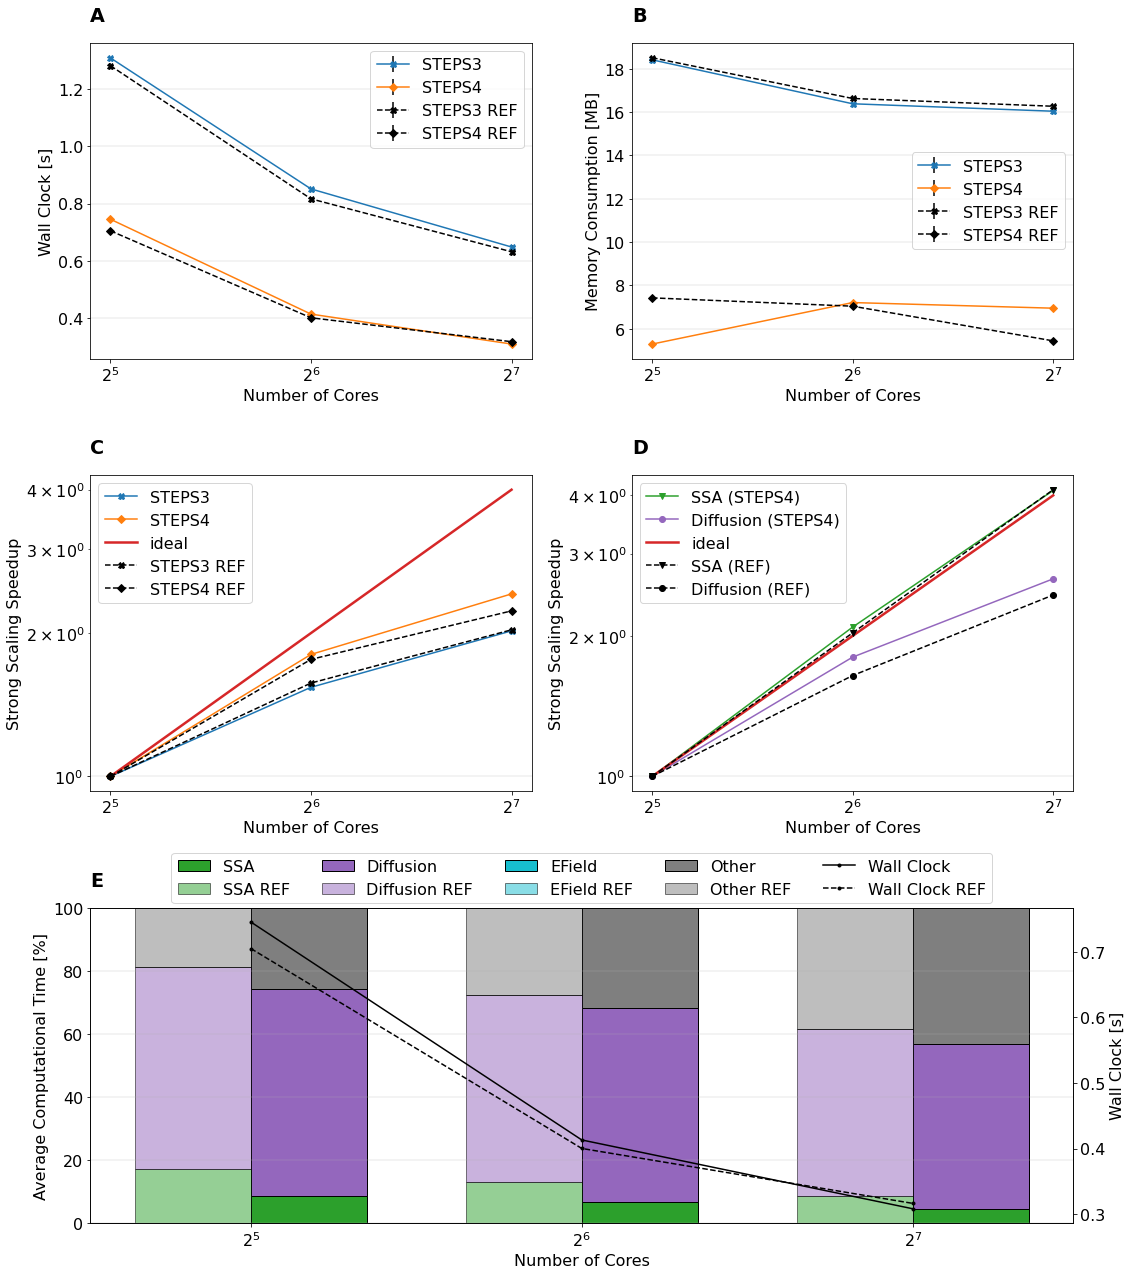

In [9]:
# *****************************************************************************
modelName = "SimpleModel"
CaliModelName = modelName+'_CALIPER'
# *****************************************************************************

figure(figsize=(16, 18), tight_layout=True)

# *****************************************************************************
# Wall Clock Graph
# *****************************************************************************
ax = plt.subplot(3,2,1)
ax.errorbar(gs[modelName+'_nc'], gs[modelName+'_WC_STEPS3'], yerr=gs[modelName+'_WC_std_STEPS3'], ecolor='black', label="STEPS3", color="tab:blue", marker='X')
ax.errorbar(gs[modelName+'_nc'], gs[modelName+'_WC_STEPS4'], yerr=gs[modelName+'_WC_std_STEPS4'], ecolor='black', label="STEPS4", color="tab:orange", marker='D')
# ref
ax.errorbar(gs[modelName+'_nc'+'_ref'], gs[modelName+'_WC_STEPS3'+'_ref'], yerr=gs[modelName+'_WC_std_STEPS3'+'_ref'], ecolor='black', label="STEPS3 REF", linestyle='dashed', color="black", marker='X')
ax.errorbar(gs[modelName+'_nc'+'_ref'], gs[modelName+'_WC_STEPS4'+'_ref'], yerr=gs[modelName+'_WC_std_STEPS4'+'_ref'], ecolor='black', label="STEPS4 REF", linestyle='dashed', color="black", marker='D')

ax.set_xscale("log", base=2)
ax.legend()
ax.set_xticks(gs[modelName+'_nc'])
ax.set_xlabel("Number of Cores")
ax.set_ylabel("Wall Clock [s]")
plt.grid(True, axis='y', linewidth=0.3)
ax.set_title('A', loc='left', y=1.05, fontweight="bold")

# *****************************************************************************
# Memory Consumption Graph
# *****************************************************************************
ax = plt.subplot(3,2,2)
ax.errorbar(gs[modelName+'_nc'], gs[modelName+'_mem_STEPS3'], yerr=gs[modelName+'_mem_std_STEPS3'], ecolor='black', label="STEPS3", color="tab:blue", marker='X')
ax.errorbar(gs[modelName+'_nc'], gs[modelName+'_mem_STEPS4'], yerr=gs[modelName+'_mem_std_STEPS4'], ecolor='black', label="STEPS4", color="tab:orange", marker='D')
# ref
ax.errorbar(gs[modelName+'_nc'+'_ref'], gs[modelName+'_mem_STEPS3'+'_ref'], yerr=gs[modelName+'_mem_std_STEPS3'+'_ref'], ecolor='black', label="STEPS3 REF", linestyle='dashed', color="black", marker='X')
ax.errorbar(gs[modelName+'_nc'+'_ref'], gs[modelName+'_mem_STEPS4'+'_ref'], yerr=gs[modelName+'_mem_std_STEPS4'+'_ref'], ecolor='black', label="STEPS4 REF", linestyle='dashed', color="black", marker='D')

ax.set_xscale("log", base=2)
ax.legend()
ax.set_xticks(gs[modelName+'_nc'])
ax.set_xlabel("Number of Cores")
ax.set_ylabel("Memory Consumption [MB]")
plt.grid(True, axis='y', linewidth=0.3)
ax.set_title('B', loc='left', y=1.05, fontweight="bold")

# *****************************************************************************
# Strong Scaling Speedup Graph
# *****************************************************************************
ax = plt.subplot(3,2,3)
ax.plot(gs[modelName+'_nc'], gs[modelName+'_speedUp_STEPS3'], label="STEPS3", color="tab:blue", marker='X')
ax.plot(gs[modelName+'_nc'], gs[modelName+'_speedUp_STEPS4'], label="STEPS4", color="tab:orange", marker='D')
ax.plot(gs[modelName+'_nc'], gs[modelName+'_speedUp_ideal'], label="ideal", color="tab:red", linewidth=2.5)
# ref
ax.plot(gs[modelName+'_nc'+'_ref'], gs[modelName+'_speedUp_STEPS3'+'_ref'], label="STEPS3 REF", linestyle='dashed', color="black", marker='X')
ax.plot(gs[modelName+'_nc'+'_ref'], gs[modelName+'_speedUp_STEPS4'+'_ref'], label="STEPS4 REF", linestyle='dashed', color="black", marker='D')

ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.legend()
ax.set_xticks(gs[modelName+'_nc'])
ax.set_xlabel("Number of Cores")
ax.set_ylabel("Strong Scaling Speedup")
plt.grid(True, axis='y', linewidth=0.3)
ax.set_title('C', loc='left', y=1.05, fontweight="bold")

# *****************************************************************************
# Components Graphs
# *****************************************************************************
ax = plt.subplot(3,2,4)
ax.plot(gs[CaliModelName+'_nc'], gs[CaliModelName+'_speedUp_SSA'], label="SSA (STEPS4)", color="tab:green", marker='v')
ax.plot(gs[CaliModelName+'_nc'], gs[CaliModelName+'_speedUp_diffusion'], label="Diffusion (STEPS4)", color="tab:purple", marker='o')
if ("CaFull" in modelName):
    ax.plot(gs[CaliModelName+'_nc'], gs[CaliModelName+'_speedUp_efield'], label="EField (STEPS4)", color="tab:cyan", marker='s')
ax.plot(gs[CaliModelName+'_nc'], gs[CaliModelName+'_speedUp_ideal'], label="ideal", color="tab:red", linewidth=2.5)
# ref
ax.plot(gs[CaliModelName+'_nc'+'_ref'], gs[CaliModelName+'_speedUp_SSA'+'_ref'], label="SSA (REF)", linestyle='dashed', color="black", marker='v')
ax.plot(gs[CaliModelName+'_nc'+'_ref'], gs[CaliModelName+'_speedUp_diffusion'+'_ref'], label="Diffusion (REF)", linestyle='dashed', color="black", marker='o')
if ("CaFull" in modelName):
    ax.plot(gs[CaliModelName+'_nc'+'_ref'], gs[CaliModelName+'_speedUp_efield'+'_ref'], label="EField (REF)", linestyle='dashed', color="black", marker='s')

ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.legend()
ax.set_xticks(gs[CaliModelName+'_nc'])
ax.set_xlabel("Number of Cores")
ax.set_ylabel("Strong Scaling Speedup")
plt.grid(True, axis='y', linewidth=0.3)
ax.set_title('D', loc='left', y=1.05, fontweight="bold")

# *****************************************************************************
# CALIPER Graph
# *****************************************************************************
ax = plt.subplot(3,2,(5,6))
labels = [r'$2^{'+ str(np.log2(i).astype(int)) + r'}$' for i in gs[CaliModelName+'_nc']]
width = 0.35
l1 = [ax.bar(labels, gs[CaliModelName+'_PER_SSA'][:,2], width, align='edge', label="SSA", color="tab:green", edgecolor="black"),
ax.bar(labels, gs[CaliModelName+'_PER_Diffusion'][:,2], width, align='edge', bottom=gs[CaliModelName+'_PER_SSA'][:,2], label="Diffusion", color="tab:purple", edgecolor="black"),
ax.bar(labels, gs[CaliModelName+'_PER_EField'][:,2], width, align='edge', bottom=gs[CaliModelName+'_PER_SSA'][:,2]+gs[CaliModelName+'_PER_Diffusion'][:,2], label="EField", color="tab:cyan", edgecolor="black"),
ax.bar(labels, gs[CaliModelName+'_PER_OTHER'][:,2], width, align='edge', bottom=gs[CaliModelName+'_PER_SSA'][:,2]+gs[CaliModelName+'_PER_Diffusion'][:,2]+gs[CaliModelName+'_PER_EField'][:,2], label="Other", color="tab:grey", edgecolor="black")
]
# ref
l2 = [ax.bar(labels, gs[CaliModelName+'_PER_SSA'+'_ref'][:,2], -width, align='edge', label="SSA REF", color="tab:green", edgecolor="black", alpha=0.5),
ax.bar(labels, gs[CaliModelName+'_PER_Diffusion'+'_ref'][:,2], -width, align='edge', bottom=gs[CaliModelName+'_PER_SSA'+'_ref'][:,2], label="Diffusion REF", color="tab:purple", edgecolor="black", alpha=0.5),
ax.bar(labels, gs[CaliModelName+'_PER_EField'+'_ref'][:,2], -width, align='edge', bottom=gs[CaliModelName+'_PER_SSA'+'_ref'][:,2]+gs[CaliModelName+'_PER_Diffusion'+'_ref'][:,2], label="EField REF", color="tab:cyan", edgecolor="black", alpha=0.5),
ax.bar(labels, gs[CaliModelName+'_PER_OTHER'+'_ref'][:,2], -width, align='edge', bottom=gs[CaliModelName+'_PER_SSA'+'_ref'][:,2]+gs[CaliModelName+'_PER_Diffusion'+'_ref'][:,2]+gs[CaliModelName+'_PER_EField'+'_ref'][:,2], label="Other REF", color="tab:grey", edgecolor="black", alpha=0.5)
]

ax.set_ylim([0, 100])
ax.set_xlabel("Number of Cores")
ax.set_ylabel("Average Computational Time [%]")
plt.grid(True, axis='y', linewidth=0.3)

ax2 = ax.twinx()
ax2.plot(labels, gs[modelName+'_WC_STEPS4'][0:len(gs[CaliModelName+'_nc'])], label="Wall Clock", color='black', marker='.')
ax2.plot(labels, gs[modelName+'_WC_STEPS4'+'_ref'][0:len(gs[CaliModelName+'_nc'+'_ref'])], label="Wall Clock REF", linestyle='dashed', color='black', marker='.')

ax2.set_ylabel("Wall Clock [s]")
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
handles = h1+h2
labels = l1+l2
order = [0,4,1,5,2,6,3,7,8,9] # do print labels to check the order - col major placement in the legend!
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True) 
ax.set_title('E', loc='left', y=1.05, fontweight="bold")

plt.savefig(modelName+'.pdf')

# *****************************************************************************
print()
# *****************************************************************************